In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

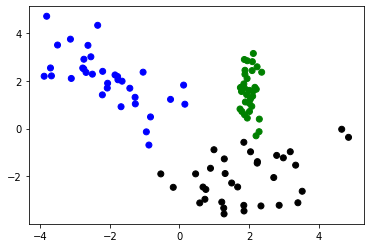

In [20]:
X, y = datasets.make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, flip_y=0, class_sep=2, random_state=0)
col = np.where(y==0,'b', np.where(y==2, 'k', 'g'))
plt.scatter(X[:, 0], X[:, 1], c=col)
#plt.axis("off")
#plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')
plt.show()

#X = X.tolist()
#y = y.tolist()

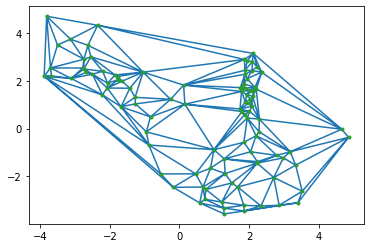

In [21]:
tri = Delaunay(X)
plt.triplot(X[:,0], X[:,1], tri.simplices)
plt.plot(X[:,0], X[:,1], '.')
#plt.axis("off")
plt.show()

In [10]:
class clustering:
  def __init__(self, X):
    self.X = X
    self.tri = Delaunay(X)
    self.triangles = self.tri.simplices
    self.areas = 0.5*np.abs(self.X[self.triangles[:, 0], 0]*(self.X[self.triangles[:, 1], 1]-self.X[self.triangles[:, 2], 1]) + 
                     self.X[self.triangles[:, 1], 0]*(self.X[self.triangles[:, 2], 1]-self.X[self.triangles[:, 0], 1]) + 
                     self.X[self.triangles[:, 2], 0]*(self.X[self.triangles[:, 0], 1]-self.X[self.triangles[:, 1], 1]))
    self.density = 1/self.areas              
    self.centroids = (self.X[self.triangles[:, 0]] + self.X[self.triangles[:, 1]] + self.X[self.triangles[:, 2]])/3
                                             
  def distance_measure(self, cluster_indices):
    cluster = self.centroids[cluster_indices]      
    distance_array = []
    for i in range(len(self.centroids)):
      #euclidean_distance = ((np.abs(cluster[:, 0] - self.centroids[i, 0]))**2 + (np.abs(cluster[:, 1] - self.centroids[i, 1]))**2)**0.5
      #dist_measure = (self.density[cluster_indices] + self.density[i])*euclidean_distance
      manhattan_distance = np.abs(cluster[:, 0] - self.centroids[i, 0]) + np.abs(cluster[:, 1] - self.centroids[i, 1])
      dist_measure = (self.density[cluster_indices] + self.density[i])*manhattan_distance
      distance_array.append(dist_measure)
    return distance_array
  
  def true_distance(self, cluster_indices):
    cluster = self.centroids[cluster_indices]     
    distance_array = []
    for i in range(len(self.X)):
      #euclidean_distance = ((np.abs(cluster[:, 0] - self.X[i, 0]))**2 + (np.abs(cluster[:, 1] - self.X[i, 1]))**2)**0.5
      manhattan_distance = np.abs(cluster[:, 0] - self.X[i, 0]) + np.abs(cluster[:, 1] - self.X[i, 1])
      #distance_array.append(euclidean_distance)
      distance_array.append(manhattan_distance)
    return distance_array

  def step(self, k): 
    cluster_indices = np.array([])
    for j in range(k-1):
      index_of_min = np.array([])
      min_distances = np.array([])
      if j==0:
        cluster_indices = np.append(cluster_indices, np.argmax(self.density)).astype('int32')
        distance_array = np.asarray(self.distance_measure(cluster_indices))
      else:
        distance_array = np.append(distance_array, np.asarray(self.distance_measure([index_of_max])), axis=1)
      for i in range(len(distance_array)):
        index_of_min = np.append(index_of_min, np.argmin(distance_array[i])).astype('int32')
      for i in range(len(index_of_min)):
        min_distances = np.append(min_distances, distance_array[i, index_of_min[i]])
      index_of_max = np.argmax(min_distances)
      cluster_indices = np.append(cluster_indices, index_of_max)
    cluster_centers = self.centroids[cluster_indices]
    return cluster_centers, cluster_indices, self.centroids
    
  def get_labels(self, cluster_indices):
    labels = np.array([])
    distance_array = self.true_distance(cluster_indices) #no. of cluster centers will be equal to k
    for i in range(len(distance_array)):
        labels = np.append(labels, np.argmin(distance_array[i])).astype('int32')
    return labels

In [11]:
cluster = clustering(X)

In [12]:
cluster_centers, cluster_indices, centroids = cluster.step(3)

In [13]:
cluster_centers

array([[ 1.79225193,  1.76602501],
       [-3.48822463,  3.97123061],
       [ 2.71014171, -3.24982566]])

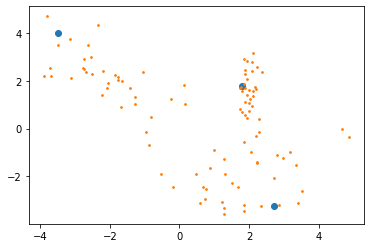

In [19]:
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1])
plt.scatter(X[:, 0], X[:, 1], s=3)
plt.show()

In [ ]:
labels = cluster.get_labels(cluster_indices)

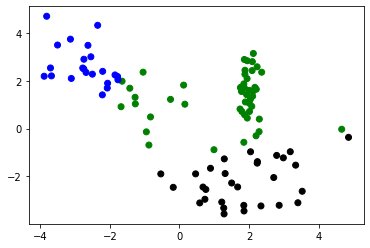

In [ ]:
col = np.where(labels==0,'g', np.where(labels==2, 'k', 'b'))
#plt.plot(distance_array[:, 0], distance_array[:, 1], "-")
plt.scatter(X[:, 0], X[:, 1], c=col)
plt.show()